Here is the marking script for PDIoT Coursework 1.

#### Data Format
Please follow the instructions in the Week 2 Lab regarding the structure of your files. 

Your files need to have the following headers:
- Thingy recordings: 'timestamp', 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z', 'sensor_type', 'activity_type', 'activity_code', 'subject_id', 'notes', 'recording_id'
- Respeck recordings: 'timestamp', 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'sensor_type', 'activity_type', 'activity_code', 'subject_id', 'notes', 'recording_id'
The contents of each column are taken from the raw data and from the csv headers you get from each recording. We provide explicit code on how to format your files in the Week 2 Lab notebook. Verify that your recordings have the correct frequency of 25Hz.

The folder structure of your files is explained in the Week 2 Lab.

#### Marking Criteria
We will use an automated script to check the files you have submitted. The coursework is worth 15% of your final mark. We will check for the following:
- If your recordings are in the specified format, you get 3 points. Should one recording fail the script, you will get 0 marks for the entire coursework.
- If the cummulative length of recordings for each activitiy is precisely 30 seconds (+- one second is fine), you will get 3 points.
- If all the stated activities are covered by your recordings, you will get 3 points.
- We will randomly plot your recordings to check for proper trimming and cleaning. If your recordings pass this test, you will get 3 points.
- If all your recordings have the correct frequency of 25Hz, you will get 3 points. 
- Each recording that does not satisfy a point from the above will deduct your mark by an appropriate amount. 

#### Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import random

#### Helper functions and variables

In [17]:
def get_frequency(dataframe: pd.DataFrame, ts_column: str = 'timestamp') -> float:
    """
    :param dataframe: Dataframe containing sensor data. It needs to have a 'timestamp' column.
    :param ts_column: The name of the column containing the timestamps. Default is 'timestamp'.
    :returns: Frequency in Hz (samples per second)
    """

    return len(dataframe) / ((dataframe[ts_column].iloc[-1] - dataframe[ts_column].iloc[0]) / 1000)

def plot_data(rec):     
    sensor_type = rec['sensor_type'].values[0]
    
    if sensor_type == "Thingy":
        rows = 3
    else:
        rows = 2
        
    fig, ax = plt.subplots(rows, 1, figsize=(12, 18))

    # plot thingy
    ax[0].plot(rec['accel_x'], label="accel_x")
    ax[0].plot(rec['accel_y'], label="accel_y")
    ax[0].plot(rec['accel_z'], label="accel_z")
    ax[0].legend()

    ax[0].set_title(f"{rec['sensor_type'].values[0]} - {rec['activity_type'].values[0]} \n Accelerometer data")

    ax[1].plot(rec['gyro_x'], label="gyro_x")
    ax[1].plot(rec['gyro_y'], label="gyro_y")
    ax[1].plot(rec['gyro_z'], label="gyro_z")
    ax[1].legend()

    ax[1].set_title(f"{rec['sensor_type'].values[0]} - {rec['activity_type'].values[0]} \n Gyroscope data")
    
    if sensor_type == "Thingy":

        ax[2].plot(rec['mag_x'], label="mag_x")
        ax[2].plot(rec['mag_y'], label="mag_y")
        ax[2].plot(rec['mag_z'], label="mag_z")
        ax[2].legend()

        ax[2].set_title(f"{rec['sensor_type'].values[0]} - {rec['activity_type'].values[0]} \n Magnetometer data")
    
    plt.show()

In [18]:
# TODO replace this with the location on your own machine of the pdiot-data repo
# pdiot_data_dir = "../../pdiot-data/2021/"
pdiot_data_dir = "./MyData"

# student_ids = dict()

# problem_files_bad_structure_name = []
# problem_files_bad_structure_cols = []
# problem_files_bad_structure_ids = []
# problem_files_bad_structure_pandas = []
# problem_files_length = []
# problem_files_activities = []
# problem_files_plots = []
# problem_files_freq = []

In [19]:
activity_list = ["Sitting",
                 "Sitting bent forward",
                 "Sitting bent backward",
                 "Standing",
                 "Lying down left",
                 "Lying down right",
                 "Lying down on stomach",
                 "Lying down on back",
                 "Walking at normal speed",
                 "Running",
                 "Climbing stairs",
                 "Descending stairs",
                 "Desk work",
                 "Movement"]

thingy_cols_list = ['timestamp', 'accel_x', 'accel_y', 'accel_z', 
                    'gyro_x', 'gyro_y', 'gyro_z', 
                    'mag_x', 'mag_y', 'mag_z', 
                    'sensor_type', 'activity_type', 'activity_code', 
                    'subject_id', 'notes', 'recording_id']

respeck_cols_list = ['timestamp', 'accel_x', 'accel_y', 'accel_z', 
                     'gyro_x', 'gyro_y', 'gyro_z', 
                     'sensor_type', 'activity_type', 'activity_code', 
                     'subject_id', 'notes', 'recording_id']

expected_freq = 25

expected_length_seconds = 30

In [20]:
for s in os.listdir(pdiot_data_dir) :
    print(s)

s1918275


In [21]:
all_student_ids = [s for s in os.listdir(pdiot_data_dir) if s[0]=='s' ]
all_student_ids

['s1918275']

### Basic marking

Go through each file for each student and check that it satisfies the marking criteria.

In [22]:
columns_for_marking_basic = ['Student ID',
                             'Folders are real student IDs - s1234567 of length 8',
                             'Can read in Pandas',
                             'One folder only contains recordings from the specified subject ID', # look in the file, split by recording id
                             'The recording ID is: sensor_subjectId_activityName_date_time', # not necessary
                             'Sensor names must be Respeck or Thingy', # look in the file
                             'Column names must be consistent with the specified sensor',
                             'Activity names must be from the list of activities',
                             'One file only contains data for one type of activity', # one rec id
                             'One file only contains data for one type of sensor', # one rec id
                             'One file only contains data for one subject id', # one rec id
                            ]
#                       'File contents are consistent with the file name - activity name',
#                       'File contents are consistent with the file name - sensor type',
#                       'File contents are consistent with the file name - recording_id apart from concats',
#                       'File contents are consistent with the file name - subject id']

columns_for_marking_rec_length = activity_list
columns_for_marking_activities_covered = activity_list
columns_for_marking_random_plots = activity_list
columns_for_marking_frequency = activity_list

We have a dataframe for each marking requirement

In [23]:
df_marking_basic = pd.DataFrame(columns=columns_for_marking_basic)
df_marking_rec_length = pd.DataFrame(columns=pd.MultiIndex.from_product([activity_list, ['Respeck', 'Thingy']]),
                index=all_student_ids)
df_marking_activities = pd.DataFrame(columns=pd.MultiIndex.from_product([activity_list, ['Respeck', 'Thingy']]),
                index=all_student_ids)
df_marking_plots = pd.DataFrame(columns=columns_for_marking_random_plots, index=all_student_ids)
df_marking_freq = pd.DataFrame(columns=pd.MultiIndex.from_product([activity_list, ['Respeck', 'Thingy']]),
                index=all_student_ids)

In [24]:
df_marking_basic['Student ID'] = all_student_ids

In [25]:
df_marking_basic.replace(np.nan, "", inplace=True)

In [26]:
df_marking_rec_length.replace(np.nan, 0, inplace=True)
df_marking_rec_length

Sitting        Sitting bent forward        Sitting bent backward  \
         Respeck Thingy              Respeck Thingy               Respeck   
s1918275       0      0                    0      0                     0   

                Standing        Lying down left         ... Running         \
         Thingy  Respeck Thingy         Respeck Thingy  ... Respeck Thingy   
s1918275      0        0      0               0      0  ...       0      0   

         Climbing stairs        Descending stairs        Desk work         \
                 Respeck Thingy           Respeck Thingy   Respeck Thingy   
s1918275               0      0                 0      0         0      0   

         Movement         
          Respeck Thingy  
s1918275        0      0  

[1 rows x 28 columns]

In [27]:
for sid in os.listdir(pdiot_data_dir):
    # only look into the student ID folders
    if sid[0] == 's':
        
        # check if they are real student IDs
        if len(sid) != 8:
            error_message = f"Incorrect student ID - {sid}, length is {len(sid)}"
            print(error_message)
            col_name = "Folders are real student IDs - s1234567 of length 8"
            student_id = sid
            df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
            
        folder_path = f"{pdiot_data_dir}/{sid}"
        
        for file in os.listdir(folder_path):
            
            # check if each file is from the same student ID as the folder
            file_path = f"{folder_path}/{file}"
            print("*"*80)
            print(f"File {file_path}")
            print("*" * 80)
                
            loaded_file = None

            # try to read in pandas
            try:
                loaded_file = pd.read_csv(file_path)
            except:
                error_message = f"Cannot read file {file} in pandas"
                print(error_message)
                col_name = 'Can read in Pandas'
                student_id = df_marking_basic['Student ID'] == sid
                df_marking_basic.loc[student_id, col_name] += error_message + ' --- '

            # check the columns
            if loaded_file is not None:
                
                # check that there is a recording_id column
                if 'recording_id' not in loaded_file.columns:
                    error_message = f"Unexpected columns for file {file_path}, expected to have a recording_id column but there is none"
                    print(error_message)
                    col_name = 'Column names must be consistent with the specified sensor'
                    student_id = df_marking_basic['Student ID'] == sid
                    df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                    continue
                
                # split by recording ID
                for rid, group in loaded_file.groupby('recording_id'):
                    
                    errors_detected = False
                    
                    # check the recording ID format
                    try:
                        sensor, subject_id, activity_name, date, time = rid.split("_")
                    
                    except:
                        error_message = f"Unexpected recording ID format, expected sensor_subjectid_activity name_date_time but found {rid} in {file_path}"
                        print(error_message)
                        col_name = 'The recording ID is: sensor_subjectId_activityName_date_time'
                        student_id = df_marking_basic['Student ID'] == sid
                        df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                        sensor = rid.split("_")[0]
                
                    # check the file columns
                    if sensor == "Respeck":
                        if set(group.columns) != set(respeck_cols_list):
                            error_message = f"Unexpected columns for file {file_path}, expected {respeck_cols_list} but found {group.columns}"
                            print(error_message)
                            col_name = 'Column names must be consistent with the specified sensor'
                            student_id = df_marking_basic['Student ID'] == sid
                            df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                            errors_detected = True
                            
                    elif sensor == "Thingy":
                        if set(group.columns) != set(thingy_cols_list):
                            error_message = f"Unexpected columns for file {file_path}, expected {thingy_cols_list} but found {group.columns}"
                            print(error_message)
                            col_name = 'Column names must be consistent with the specified sensor'
                            student_id = df_marking_basic['Student ID'] == sid
                            df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                            errors_detected = True

                    # just one activity?
                    number_of_activities_in_recording = len(group['activity_type'].unique())
                    if number_of_activities_in_recording > 1:
                        error_message = f"File {file_path}, rid {rid} contains more than one activity: {group['activity_type'].unique()}"
                        print(error_message)
                        col_name = 'One file only contains data for one type of activity'
                        student_id = df_marking_basic['Student ID'] == sid
                        df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                        errors_detected = True
                    else:
                        
                        recorded_activity = group['activity_type'].values[0]
                        # activity in the list of activities
                        if recorded_activity not in activity_list:
                            error_message = f"File {file_path}, rid {rid} contains an activity not in the list: {recorded_activity}"
                            print(error_message)
                            col_name = 'Activity names must be from the list of activities'
                            student_id = df_marking_basic['Student ID'] == sid
                            df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                            errors_detected = True


                    # just one sensor?
                    number_of_sensors_in_recording = len(group['sensor_type'].unique())
                    if number_of_sensors_in_recording > 1:
                        error_message = f"File {file_path}, rid {rid} contains more than one sensor type: {group['sensor_type'].unique()}"
                        print(error_message)
                        col_name = 'One file only contains data for one type of sensor'
                        student_id = df_marking_basic['Student ID'] == sid
                        df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                        errors_detected = True
                    else:
                        # sensor in the list of sensor
                        recorded_sensor = group['sensor_type'].values[0]
                        if recorded_sensor not in ["Respeck", "Thingy"]:
                            # check that each recording in a folder has a good sensor name
                            error_message = f"File {file_path}, rid {rid} Unexpected sensor name, expected Respeck or Thingy but found - {recorded_sensor}"
                            print(error_message)
                            col_name = "Sensor names must be Respeck or Thingy"
                            student_id = df_marking_basic['Student ID'] == sid
                            df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                            errors_detected = True

                    
                    # just one student ID?
                    number_of_subject_ids_in_recording = len(group['subject_id'].unique())
                    if number_of_subject_ids_in_recording > 1:
                        error_message = f"File {file_path}, rid {rid} contains more than one subject id: {group['subject_id'].unique()}"
                        print(error_message)
                        col_name = 'One file only contains data for one subject id'
                        student_id = df_marking_basic['Student ID'] == sid
                        df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                        errors_detected = True
                    else:
                        
                        recorded_subject_id = group['subject_id'].values[0]
                        # activity in the list of activities
                        if recorded_subject_id != sid:
                            error_message = f"File {file_path}, rid {rid} contains the subject id {recorded_subject_id} which is different from the folder {sid}"
                            print(error_message)
                            col_name = 'One folder only contains recordings from the specified subject ID'
                            student_id = df_marking_basic['Student ID'] == sid
                            df_marking_basic.loc[student_id, col_name] += error_message + ' --- '
                            errors_detected = True
                    
                    if not errors_detected:
                        activity_type = group['activity_type'].values[0]
                        freq = get_frequency(group)
                        sensor_type = group['sensor_type'].values[0]
                        subject_id = group['subject_id'].values[0]
                        rec_length = len(group) / freq
                        
                        df_marking_rec_length.loc[subject_id, (activity_type,sensor_type)] += rec_length
                        df_marking_activities.loc[subject_id, (activity_type,sensor_type)] = 1
                        if freq > 27 or freq < 23:
                            df_marking_freq.loc[subject_id, (activity_type,sensor_type)] = freq
           

********************************************************************************
File ./MyData/s1918275/Respeck_s1918275_Sitting bent forward_01-10-2022_13-34-35.csv
********************************************************************************
********************************************************************************
File ./MyData/s1918275/Respeck_s1918275_Climbing stairs_01-10-2022_14-00-09.csv
********************************************************************************
********************************************************************************
File ./MyData/s1918275/Respeck_s1918275_Movement_01-10-2022_14-11-39.csv
********************************************************************************
********************************************************************************
File ./MyData/s1918275/Thingy_s1918275_Movement_01-10-2022_14-10-59.csv
********************************************************************************
******************************************

This is how you can check which IDs failed the basic test - these will get 0 as their mark

In [28]:
failing_ids = df_marking_basic.replace("", np.nan).dropna(thresh=2)
failing_ids

,Student ID,Folders are real student IDs - s1234567 of length 8,Can read in Pandas,One folder only contains recordings from the specified subject ID,The recording ID is: sensor_subjectId_activityName_date_time,Sensor names must be Respeck or Thingy,Column names must be consistent with the specified sensor,Activity names must be from the list of activities,One file only contains data for one type of activity,One file only contains data for one type of sensor,One file only contains data for one subject id


### Random plotting

Plot five recordings at random from each folder

In [29]:
student_ids = {k: [] for k in all_student_ids}

for sid in os.listdir(pdiot_data_dir):
    # only look into the student ID folders
    if sid[0] == 's':
            
        folder_path = f"{pdiot_data_dir}/{sid}"
        
        all_files = [f"{folder_path}/{file_path}" for file_path in os.listdir(folder_path)]
        
        # choose random 5
        random_files = random.sample(all_files, k=5)
        
        # append to that student id
        student_ids[sid].extend(random_files)

Plotting s1918275


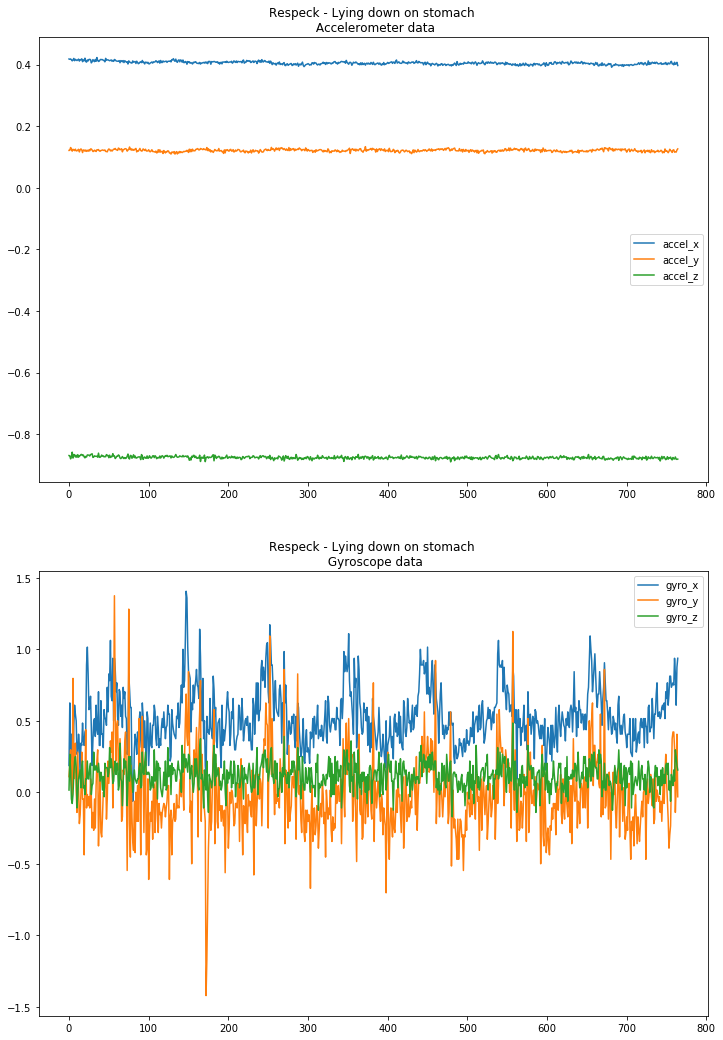

Is this ok?Good
Why?GOod


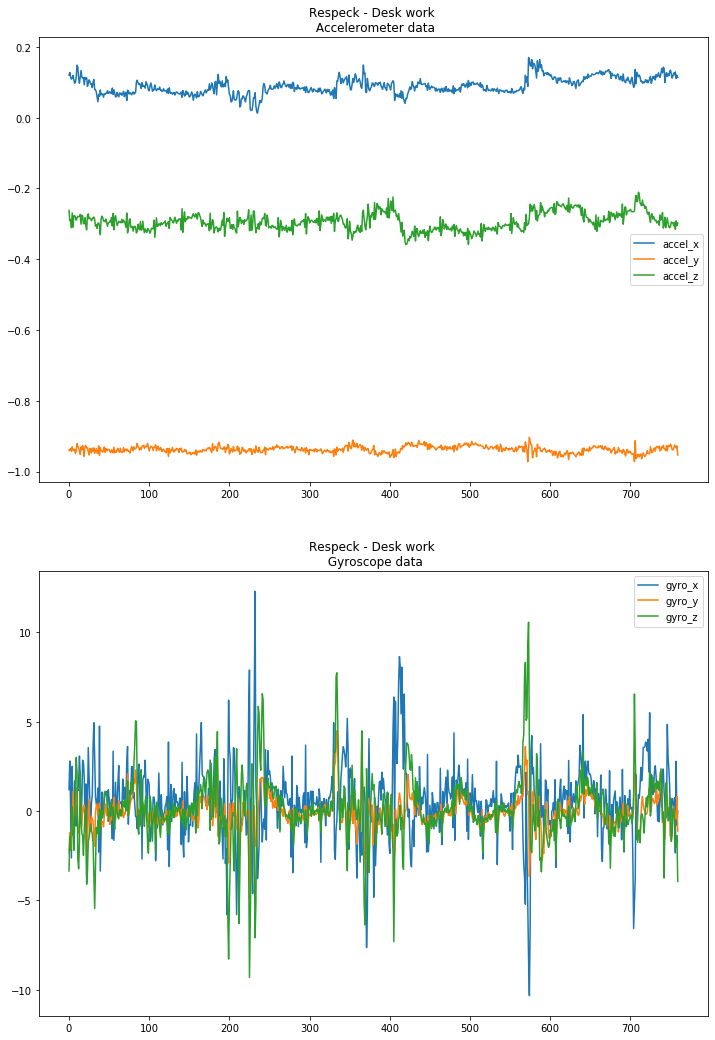

Is this ok?Good
Why?Good


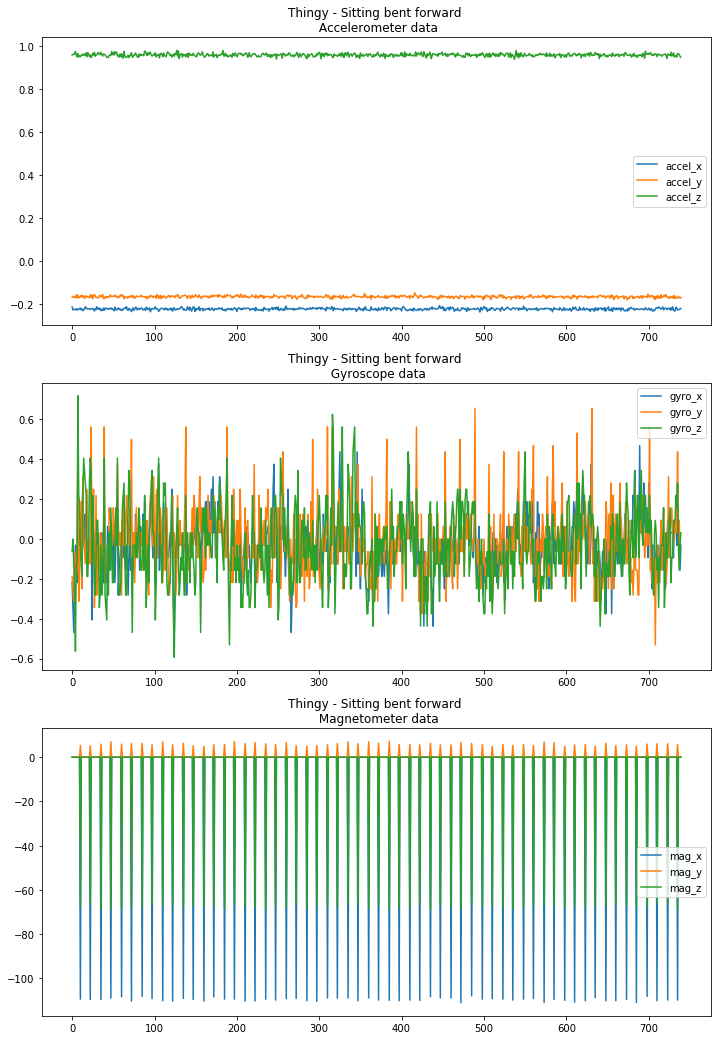

Is this ok?
Why?Good


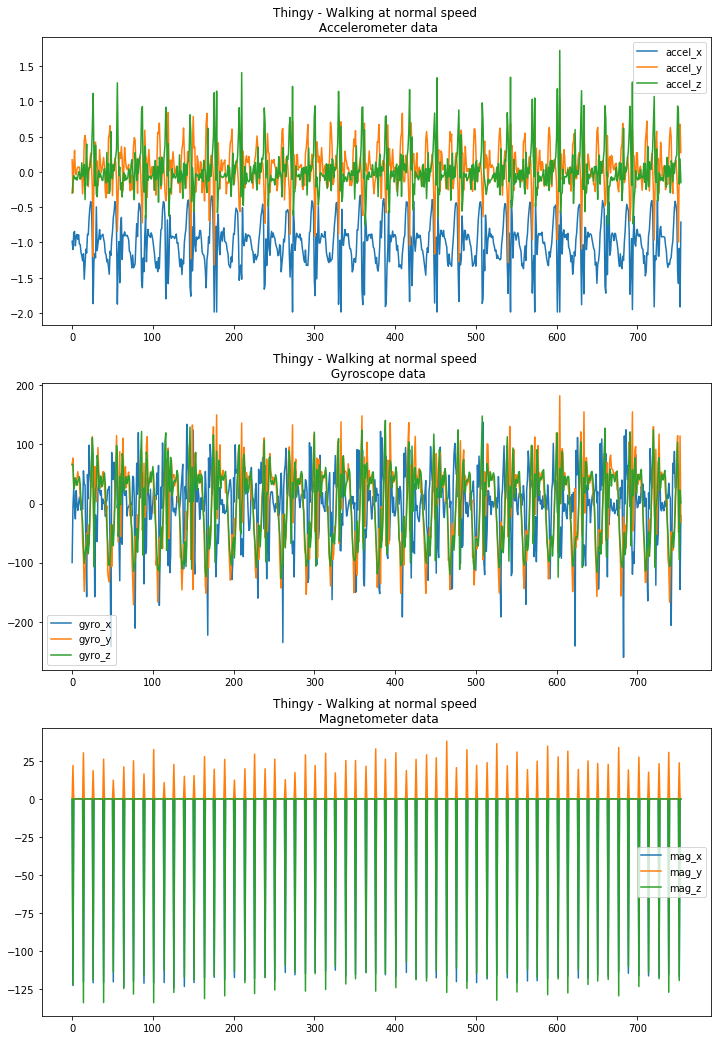

Is this ok?Good
Why?Good


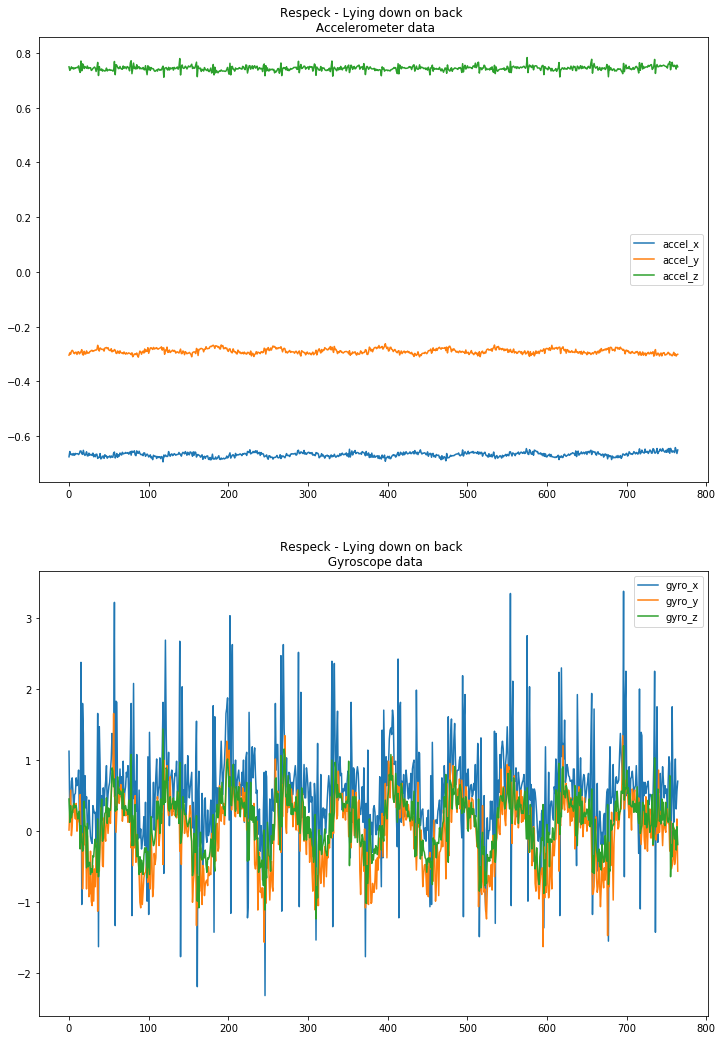

Is this ok?Good
Why?Good


In [30]:
for sid, recs in student_ids.items():

    print(f"Plotting {sid}")

    for rec_path in recs:
        rec = pd.read_csv(rec_path)

        # if there are multiple recording ids in there plot each one separately
        if len(rec['recording_id'].unique()) > 1:
            for rid, group in rec.groupby('recording_id'):
                group.reset_index(inplace=True, drop=True)
                plot_data(group)
        else:
            plot_data(rec)


        # ask for input if these are OK or not
        ok_input = input("Is this ok?")
        if ok_input == "y":
            df_marking_plots.loc[sid, rec['activity_type'].values[0]] = "GOOD"
        else:
            reason_input = input("Why?")
            df_marking_plots.loc[sid, rec['activity_type'].values[0]] = f"BAD = {reason_input}"

In [31]:
Good# TODO save these on your computer if needed
# df_marking_activities.to_csv("./df_marking_activities.csv")
# df_marking_basic.to_csv("./df_marking_basic.csv")
# df_marking_freq.to_csv("./df_marking_freq.csv")
# df_marking_plots.to_csv("./df_marking_plots.csv")
# df_marking_rec_length.to_csv("./df_marking_rec_length.csv")

df_marking_basic.set_index('Student ID', inplace=True)

### Generate a report for each student

In [32]:
for sid in all_student_ids:
    print(f"Generating report for {sid}")
    filename = f"{sid}_cw1_marks.txt"
    with open(f"./{filename}", "w") as f:
    
        total_points = 0
        failed = False

        f.write("*"*80)
        f.write("\n")
        f.write(f"Student ID = {sid}\n")
        f.write("*"*80)
        f.write("\n")

        f.write('\n\n')

        f.write('-'*40)
        f.write("\n")
        f.write("Basic structure of files\n")
        f.write('-'*40)
        f.write("\n")

        if sid in failing_ids.index:
            f.write("FAILED\n")
            failed = True

            failing_row = failing_ids.loc[sid]
            values = failing_row[failing_row.notnull()].values

            for value in values:
                # split
                text = value.split("---")
                for t in text:
                    f.write(f"{t}\n")

            section_points = 0


        else:
            f.write("PASSED\n")
            section_points = 3
            f.write(f"Section points = {section_points}\n")

        total_points += section_points


        f.write('-'*40)
        f.write("\n")
        f.write("Recording length\n")
        f.write('-'*40)
        f.write("\n")

        recs_short = df_marking_rec_length.loc[sid][df_marking_rec_length.loc[sid] < 29].index
        recs_long = df_marking_rec_length.loc[sid][df_marking_rec_length.loc[sid] > 31].index

        if len(recs_short) == 0 and len(recs_long) == 0:
            f.write("PASSED\n")
            section_points = 3
            f.write(f"Section points = {section_points}\n")

        else:

            # initialise section points
            section_points = 3
            # and subtract for each bad recording
            if len(recs_short) > 0:
                f.write("The following recordings were shorter than 29 seconds:\n")
                for col_name in recs_short:
                    activity, sensor = col_name
                    recording_length = df_marking_rec_length.loc[sid, col_name]
                    f.write(f"{sensor}_{sid}_{activity} had a total recoding length of {recording_length}\n")
                    section_points -= 3/36

            if len(recs_long) > 0:
                f.write("The following recordings were longer than 31 seconds:\n")
                for col_name in recs_long:
                    activity, sensor = col_name
                    recording_length = df_marking_rec_length.loc[sid, col_name]
                    f.write(f"{sensor}_{sid}_{activity} had a total recoding length of {recording_length}\n")
                    section_points -= 3/36

            f.write(f"Section points = {section_points}\n")

        total_points += section_points

        f.write('-'*40)
        f.write("\n")
        f.write("Activity completion\n")
        f.write('-'*40)
        f.write("\n")
        missing_activities = df_marking_activities.loc[sid][df_marking_activities.loc[sid] != 1].index

        if len(missing_activities) == 0:
            f.write("PASSED\n")
            section_points = 3
            f.write(f"Section points = {section_points}\n")
        else:
            section_points = 3
            for act in missing_activities:
                activity, sensor = act
                f.write(f"{sensor}_{sid}_{activity} was not found\n")
                section_points -= 3/36

            f.write(f"Section points = {section_points}\n")

        total_points += section_points

        f.write('-'*40)
        f.write("\n")
        f.write("Random plots\n")
        f.write('-'*40)
        f.write("\n")
        good_mask = (df_marking_plots.loc[sid].notnull()) & (df_marking_plots.loc[sid].str.contains("GOOD"))
        bad_mask = (df_marking_plots.loc[sid].notnull()) & ~((df_marking_plots.loc[sid].str.contains("GOOD", na=False)))

        good_plots = df_marking_plots.loc[sid][good_mask].index
        bad_plots = df_marking_plots.loc[sid][bad_mask].index

        if len(good_plots) == 5:
            f.write("PASSED\n")
            section_points = 3
            f.write(f"Section points = {section_points}\n")
        else:
            section_points = 3
            for col in bad_plots:
                activity = col
                issues = df_marking_plots.loc[sid, col]
                issues = issues.split("=")[1]

                random_recordings = student_ids[sid]
                # find the recording in question 

                rec_we_need = [l for l in random_recordings if activity in l]
                if len(rec_we_need) == 1:
                    f.write(f"{rec_we_need[0]} plot had the issue of: {issues}\n")
                else:
                    f.write(f"{rec_we_need} plot had the issue of: {issues}\n")

            section_points -= min(3, len(bad_plots))

            f.write(f"Section points = {section_points}\n")

        total_points += section_points

        f.write('-'*40)
        f.write("\n")
        f.write("Recording frequency\n")
        f.write('-'*40)
        f.write("\n")
        wrong_freqs = df_marking_freq.loc[sid][df_marking_freq.loc[sid].notnull()].index

        if len(wrong_freqs) == 0:
            f.write("PASSED\n")
            section_points = 3
            f.write(f"Section points = {section_points}\n")
        else:
            section_points = 3
            for frq in wrong_freqs:
                frequency = df_marking_freq.loc[sid, frq]
                activity, sensor = frq
                f.write(f"{sensor}_{sid}_{activity} had a frequency of {frequency}\n")
                section_points -= 3/36

            f.write(f"Section points = {section_points}\n")

        total_points += section_points
        
        f.write("\n\n")

        f.write('*'*80)
        f.write("\n")
        f.write("Total points\n")
        f.write('*'*80)
        f.write("\n")
        if not failed:
            f.write(str(total_points))
        else:
            f.write(f"0 - FAILED\n")
        
        # TODO remove this when running the entire script
        break

Generating report for s1918275
